# Ondas y Señales
<p><code>Python en Jupyter Notebook</code></p>
<p>Creado por <code>Giancarlo Ortiz</code> para el curso de <code>Redes</code></p>

## Medios para representar información
Las ondas se convierten en señales cuando variamos aleatoriamente alguno de sus parámetros periódicos para representar alguna información; la cantidad de información es proporcional a la aleatoriedad de una señal y por tanto las ondas al ser una variación periódica no llevan información.

### Agenda
1. Ondas.
1. Ondas portadoras.
1. Señales análogas.
1. Señales digitales.
1. Ancho de banda.

In [1]:
# Importar módulos al cuaderno
import wave
import pyaudio
import numpy as np
import matplotlib.pyplot as plt

# Importar elementos de un módulo al cuaderno
from matplotlib.ticker import MultipleLocator, AutoMinorLocator, FixedLocator
from datetime import timedelta
from math import pi, floor
from numpy import sin

## 1. [Ondas](#)
---
Una [onda][1] representa la propagación de una perturbación de alguna propiedad física del espacio

[1]:https://es.wikipedia.org/wiki/Onda

### 1.1. Descripción matemática ✔
Toda onda periódica puede ser descrita matemáticamente por la ecuación diferencial

$$ \frac{\partial ^2 f(x,t)}{\partial x^2}=\frac{1}{v^2} \frac{\partial ^2 f(x,t)}{\partial t^2} $$

Cuya solución son las funciones de la forma

$$ f(x,t) = A(x,t) \cdot sin( \omega t - kx + \theta) $$

donde:

* $ k = \dfrac{w}{v_f} $ <code> es el numero de onda</code>.
* $ \omega = 2 \pi f =\dfrac{2 \pi v_f}{\lambda}$ <code >es la frecuencia angular</code>.
* $ f =\dfrac{v_f}{\lambda} $ <code >es la frecuencia temporal</code>.
* $ \theta $ <code >es la fase</code>.

 ----------------------------------------------
 Frecuencia de la portadora:                2.5 Khz
 Periodo de la portadora:                   0.4 ms
 Fase de la portadora:                     -6.3 rad
 Frecuencia angular de la portadora:   15,708.0 rad/s
 Longitud de onda de la portadora:          0.1 mts
 ----------------------------------------------


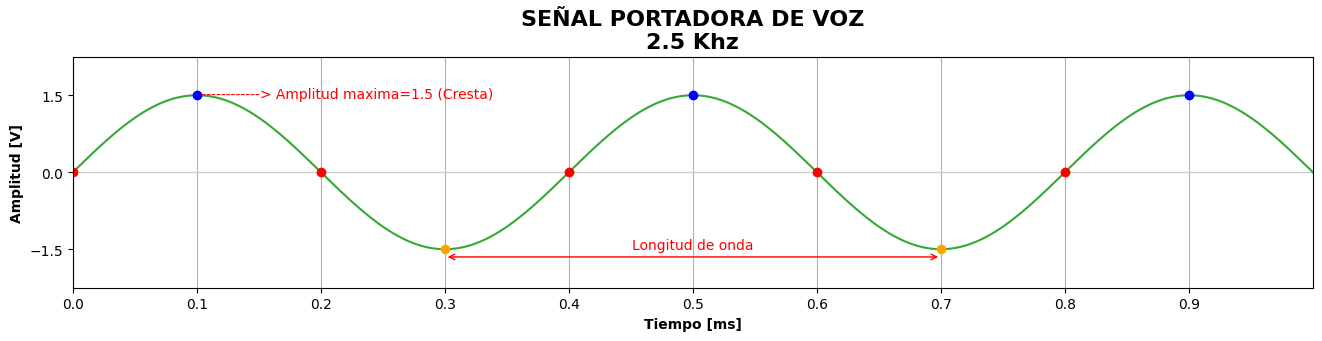

In [2]:
# Caracterización de una onda (Voz)
# ---------------------------------------------------------
f = 2_500           # Frecuencia de la onda voz (3400)
A = 1.5             # Amplitud de la onda (40 dB)
θ = -8*pi/4          # Fase de la onda (2*π > θ > -2*π)
vf = 343.2          # Velocidad del sonido (propagación)
# ---------------------------------------------------------
w = 2 * pi * f      # Frecuencia angular de la onda
T = 1/f             # Periodo de la onda
λ = vf/f            # Longitud de onda de la portadora
# ---------------------------------------------------------
nλ = 2.5            # Número de longitudes de onda visibles
λ4 = int(4*nλ)      # Número de cuartos de longitudes de onda visibles (Entero>8)
to = -θ/w           # Tiempo inicio


# Puntos críticos de la función de onda
# ---------------------------------------------------------
nodo = to
cresta = to+T/4
valle = to+3*T/4
if θ > 0:
    while nodo < T/100:
        nodo = nodo + T/2

    while cresta < T/100:
        cresta = cresta + T

    while valle < T/100:
        valle = valle + T

if θ < 0:
    while nodo > -T/100:
        nodo = nodo - T/2

    while cresta > -T/100:
        cresta = cresta - T

    while valle > -T/100:
        valle = valle - T

    nodo = nodo + T/2
    cresta = cresta + T
    valle = valle + T
# ---------------------------------------------------------
num_nodos = floor(λ4/2)
num_crestas = floor(λ4/4+1)
num_valles = floor(λ4/4+1)
críticos = np.linspace(min(nodo, cresta, valle), nλ/f+to, λ4+1, endpoint=True)
nodos = np.linspace(nodo, nodo+(T/2) * (num_nodos-1), num_nodos, endpoint=True)
crestas = np.linspace(
    cresta, cresta + T*(num_crestas-1), num_crestas, endpoint=True)
valles = np.linspace(
    valle, valle + T*(num_valles-1), num_valles, endpoint=True)


# Salida estándar
# ---------------------------------------------------------
lines = 46
print(" " + lines*"-")
print(f" Frecuencia de la portadora:            {f/1_000:7.1f} Khz")
print(f" Periodo de la portadora:               {1000*T:7.1f} ms")
print(f" Fase de la portadora:                  {θ:7.1f} rad")
print(f" Frecuencia angular de la portadora:   {round(w):,.1f} rad/s")
print(f" Longitud de onda de la portadora:      {λ:7.1f} mts")
print(" " + lines*"-")


'''# Máximos y nodos de la onda
nodos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 == 0])
máximos = np.array([críticos[i] for i in range(len(críticos)) if i % 2 != 0])
# crestas y valles de la onda
crestas = np.array([máximos[i] for i in range(len(máximos)) if i % 2 == 0])
valles = np.array([máximos[i] for i in range(len(máximos)) if i % 2 != 0]) '''
# ---------------------------------------------------------


# Gráfica
# ----------------------------------------------------
# Un solo eje una sola gráfica - Señal portadora de voz
plt.figure(figsize=(16, 3))
# Vector de tiempo acorde a la frecuencia de la señal
t = np.linspace(0, nλ/f, 512, endpoint=True)
# Onda
y = A * sin(w*t + θ)
# linea horizontal
plt.axhline(y=0, linewidth=1.0, color="#ccc")
# plt.axhline(y=-A*1.1, xmin=3/8, xmax=7/8, linewidth=1.0, color="#f00")


# Escala de ejes a valores apreciables
# ----------------------------------------------------
t *= 1_000              # Transformando t a ms
nodos *= 1_000
crestas *= 1_000
valles *= 1_000


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(t, y, color="#33aa33")


# Marcas de los puntos críticos
# ----------------------------------------------------
plt.plot(
    nodos, np.zeros(len(nodos)), color='red',
    marker='o', linestyle='None')
plt.plot(
    crestas, A*np.ones(len(crestas)),
    color='blue', marker='o', linestyle='None')
plt.plot(
    valles, -A*np.ones(len(valles)),
    color='orange', marker='o', linestyle='None')


# Limites y garrapatas
# ----------------------------------------------------
plt.xlim(t.min(), t.max())
plt.ylim(y.min()*1.5, y.max()*1.5)
plt.yticks([y.min(), 0, y.max()])
plt.xticks(np.arange(t.min(), t.max(), step=0.1))
plt.grid(axis="x", which="both")

# Textos en la gráfica
# ----------------------------------------------------
plt.title(
    "Señal portadora de voz\n".upper()
    + f"{f/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [ms]", fontweight="bold")
plt.ylabel("Amplitud [V]", fontweight="bold")
plt.text(
    crestas[0], y.max()*0.96,
    f" ------------> Amplitud maxima={A} (Cresta)", color="#ff0000")

plt.annotate(
    "", xy=(valles[0], -A*1.1), xytext=(valles[1], -A*1.1),
    arrowprops=dict(arrowstyle="<->", color="#f00"))

plt.text(
    (valles[1]+valles[0])/2, -A, f"Longitud de onda",
    horizontalalignment='center', color="#ff0000")

plt.show()

## 2. [Ondas portadoras](#agenda)
---
Una [onda portadora][2] o carrier es una onda de alta frecuencia, generalmente senoidal, a la que se le modifica alguno de sus parámetros (amplitud, frecuencia o fase) mediante una señal de baja frecuencia denominada moduladora (información) con el fin de transmitir una información.

[2]:https://es.wikipedia.org/wiki/Onda_portadora


 -----------------------------------------
 Frecuencia de la portadora:         740.0 KHz
 Longitud de onda de la portadora:   405.1 mts
 -----------------------------------------


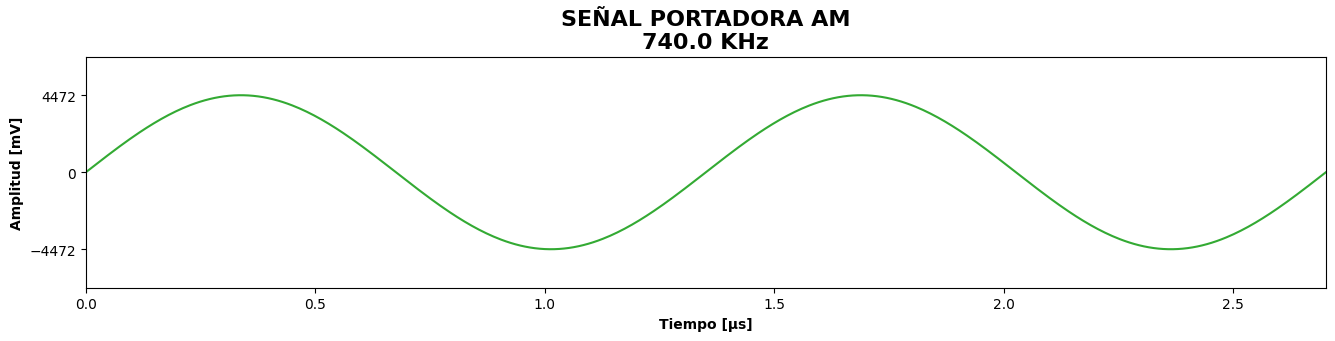

In [3]:
# [iPython] - Gráficas - Caracterización de una señal de AM
# ---------------------------------------------------------
# Ecos de pasto 740 Khz - AM - Onda media
fp = 740_000            # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Velocidad de la luz (propagación ondas electromagnéticas)
c = 299_792_458
# Potencia de un transmisor de 1 KW y antena de (50 Ω) - 100Km
Potencia = 1_000
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
λp = c/fp                # Longitud de onda de la portadora
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 2                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
# ---------------------------------------------------------
lines = 41
print(" " + lines*"-")
print(f" Frecuencia de la portadora:       {fp/1_000:7.1f} KHz")
print(f" Longitud de onda de la portadora: {λp:7.1f} mts")
print(" " + lines*"-")

# Escala de ejes a valores apreciables
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de AM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
plt.plot(t, Sp, color="#33aa33")
# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title("Señal portadora AM\n".upper() +
          f"{fp/1_000:.1f} KHz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

 -----------------------------------------
 Frecuencia de la portadora:         101.1 Mhz
 Longitud de onda de la portadora:     3.0 mts
 -----------------------------------------


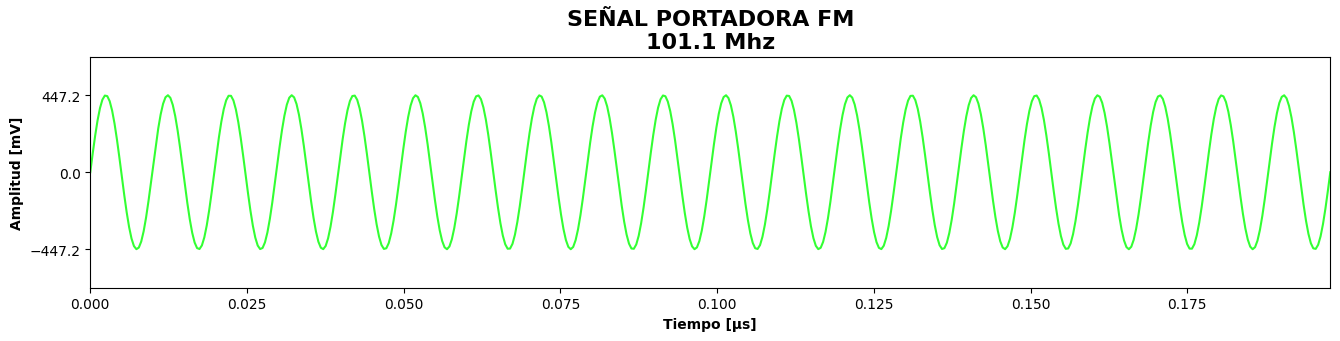

In [4]:
# [iPython] - Gráficas - Caracterización de una señal de FM
# ---------------------------------------------------------
# Emisora Universidad de Nariño 101.1 Mhz - FM
fp = 101_100_000        # Frecuencia de la portadora
Wp = 2 * pi * fp        # Frecuencia angular de la portadora
# Potencia de un transmisor de 10 W y antena de (50 Ω - 10Km)
Potencia = 10
Resistencia = 50
Ap = (Potencia/Resistencia)**(1/2)
# Vector de tiempo acorde a la frecuencia de la señal
nλ = 20                 # Número de longitudes de onda visibles
t = np.linspace(0, nλ/fp, 512, endpoint=True)

# Señal portadora de FM
# ---------------------
Sp = Ap * sin(Wp*t)

# Salida estándar
# ---------------------------------------------------------
lines = 41
print(" " + lines*"-")
print(f" Frecuencia de la portadora:       {fp/1_000_000:7.1f} Mhz")
print(f" Longitud de onda de la portadora: {299_792_458/fp:7.1f} mts")
print(" " + lines*"-")

# Escala de ejes a valores apreciables
t *= 1_000_000      # Transformando t a μs
Sp *= 1_000         # Transformando s a mV

# Gráfica
# Un solo eje una sola gráfica - Señal portadora de FM
# ----------------------------------------------------
plt.figure(figsize=(16, 3))
plt.plot(t, Sp, color="#33FF33")

# Limites y garrapatas
plt.xlim(t.min(), t.max())
plt.ylim(Sp.min()*1.5, Sp.max()*1.5)
plt.yticks([Sp.min(), 0, Sp.max()])

# Textos en la gráfica
plt.title(
    "Señal portadora FM\n".upper() +
    f"{fp/1_000_000:.1f} Mhz", fontsize=16, fontweight="bold")
plt.xlabel("Tiempo [μs]", fontweight="bold")
plt.ylabel("Amplitud [mV]", fontweight="bold")
plt.show()

## 3. [Señales análogas](#agenda)
---
Una [señal analógica][3] es una señal continua y aleatoria generada por algún tipo de fenómeno electromagnético; variable (amplitud o periodo) en el tiempo.

[3]:https://es.wikipedia.org/wiki/Se%C3%B1al_anal%C3%B3gica

In [5]:
file = "../resources/audios/ter-frase.wav"
audio_file = wave.open(file, 'rb')

# Características del equipo de audio
# ---------------------------------------------------------
# rms < 0.33 V-rms en electronica de consumo 
rms = 1.23 # En el mundo profesional
pico = rms/2**(-0.5)
pico_pico = 2 * pico

# Características de la señal
# ---------------------------------------------------------
canales_de_audio = audio_file.getnchannels()
frecuencia_de_muestreo = audio_file.getframerate()
bit_por_muestra = 8*audio_file.getsampwidth()
bit_por_hz = bit_por_muestra * frecuencia_de_muestreo
valor_máximo = (2 ** bit_por_muestra)/2
num_muestras = audio_file.getnframes()
tiempo = num_muestras/frecuencia_de_muestreo
duración = timedelta(seconds=round(tiempo))

# Intensidad del sonido como una señal en el dominio del tiempo
# ---------------------------------------------------------
frames = audio_file.readframes(-1)
señal = np.frombuffer(frames, dtype=np.int16)
y = pico * (señal/valor_máximo)                 # Normalización - des-normalización                                    
t = np.linspace(0, tiempo, num_muestras)

# Transformada de la señal al dominio de la frecuencia
# ---------------------------------------------------------
k = np.arange(num_muestras)         # Un rango como un array
frecuencia = k/tiempo               # Vector de frecuencias
FFT = np.fft.fft(y)                 # Transformada rápida de Fourier
Magnitud = np.abs(FFT)              # Magnitud de los números complejos DTF
Y = pico * Magnitud/Magnitud.max()  # Normalización - des-normalización 

# Eliminando frecuencias espejo
# ---------------------------------------------------------
f = frecuencia[range(int(num_muestras/2))]
Y = Y[range(int(num_muestras/2))]

# Salida estándar
# ---------------------------------------------------------
lines = 38
print(" " + lines*"-")
print(f" Canales de audio:          {canales_de_audio:11.0f}")
print(f" Voltaje rms:               {rms:11,.2f} voltios")
print(f" Voltaje pico:              {pico:11,.2f} voltios")
print(f" Voltaje pico-pico:         {pico_pico:11,.2f} voltios")
print(f" Número de Muestras:        {num_muestras:11,.0f} ")
print(f" Frecuencia de muestreo:    {frecuencia_de_muestreo/1_000:11.1f} KHz")
print(f" Bits por muestra:          {bit_por_muestra:11,.0f} Bits")
print(f" Eficiencia:                {bit_por_hz/1000:11,.0f} KBits/Hz")
print(f" Duración [hh:mm:ss:]:      {str(duración):>11}")
print(" " + lines*"-")

 --------------------------------------
 Canales de audio:                    1
 Voltaje rms:                      1.23 voltios
 Voltaje pico:                     1.74 voltios
 Voltaje pico-pico:                3.48 voltios
 Número de Muestras:            213,150 
 Frecuencia de muestreo:            7.3 KHz
 Bits por muestra:                   16 Bits
 Eficiencia:                        118 KBits/Hz
 Duración [hh:mm:ss:]:          0:00:29
 --------------------------------------


In [6]:
import IPython
import winsound
IPython.display.display(IPython.display.Audio(file))
#winsound.PlaySound(file, winsound.SND_FILENAME)

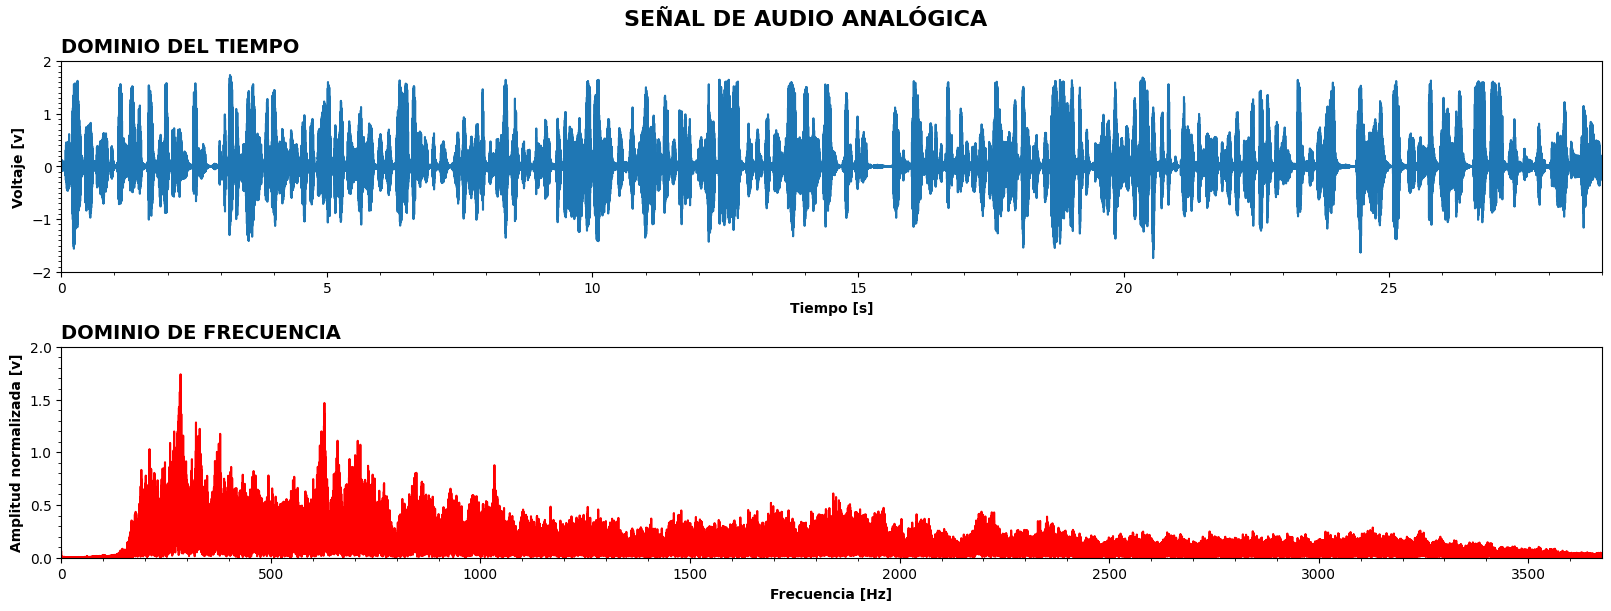

In [7]:
# Gráfica
# Representación de una señal de voz
# Dos gráficas - Dominio del tiempo y dominio de la frecuencia
# ----------------------------------------------------
fig = plt.figure(layout="constrained", figsize=(16, 6))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.plot(t, y)
ax2.plot(f, Y, 'r')

# Garrapatas
ax1.yaxis.set_major_locator(MultipleLocator(1))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.xaxis.set_major_locator(MultipleLocator(5))
ax1.xaxis.set_minor_locator(MultipleLocator(1))

ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.xaxis.set_major_locator(MultipleLocator(500))
ax2.xaxis.set_minor_locator(MultipleLocator(100))

# Limites
ax1.set_ylim([-2, 2])
ax1.set_xlim([0, t.max()])
ax2.set_ylim([0, 2])
ax2.set_xlim([0, f.max()])

# Textos en la gráfica
plt.suptitle("Señal de audio analógica".upper(), fontsize=16, fontweight="bold")
ax1.set_title("Dominio del tiempo".upper(), loc="left", fontsize=14, fontweight="bold")
ax2.set_title("Dominio de frecuencia".upper(), loc="left", fontsize=14, fontweight="bold")

ax1.set_xlabel("Tiempo [s]", fontweight="bold")
ax1.set_ylabel("Voltaje [v]", fontweight="bold")
ax2.set_xlabel("Frecuencia [Hz]", fontweight="bold")
ax2.set_ylabel("Amplitud normalizada [v]", fontweight="bold")

plt.show()

## 4. [Señales digitales](#agenda)
---
Una [señal Digital][4] es un tipo de señal discreta y aleatoria en la que cada signo codifica la información.

[4]:https://es.wikipedia.org/wiki/Se%C3%B1al_digital

### 4.1. Conversión analógica-digital ✔
La [conversión analógico-digital][41_1] consiste en la transcripción de señales analógicas en señal digital, con el propósito de facilitar su procesamiento.

[41_1]:https://es.wikipedia.org/wiki/Conversi%C3%B3n_anal%C3%B3gica-digital

### 4.1.1. Proceso
En una digitalización de la señal intervienen los siguientes procesos:

* Muestreo
* Retención
* Cuantificación
* Codificación

 --------------------------------------
 Resolución:                          8 Bits
 Frecuencia de bits:               29.4 KHz
 Tiempo bit:                         34 µs
 Total de bits:                      32 Bits
 Duración señal:                   1.09 ms
 --------------------------------------


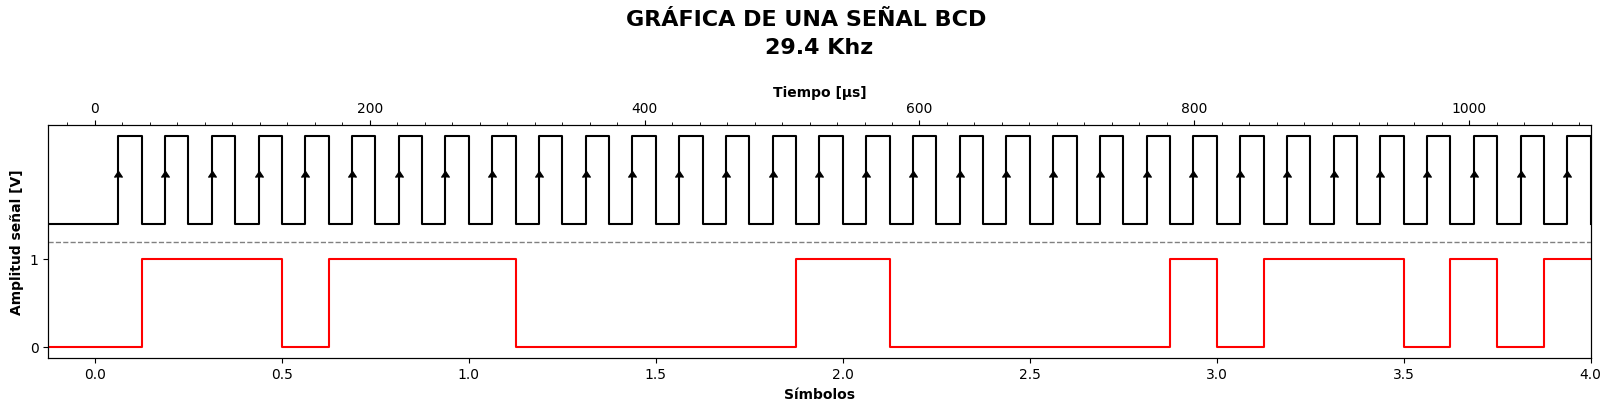

In [8]:
# Características
flanco_de_subida = True
num_símbolos = 4
muestra_inicial = 100
resolución = 8

# Muestreo
# ----------------------------------------------------
máximo = 2**resolución
total_de_bits = num_símbolos * resolución
frecuencia_bits = resolución*(frecuencia_de_muestreo/2)
tiempo_bit = 1/frecuencia_bits
tiempo_señal = total_de_bits * tiempo_bit


# Cuantizar
# ----------------------------------------------------
cuantizar = np.round(
    máximo*y[muestra_inicial:muestra_inicial+num_símbolos]+máximo/2)

# Codificar BCD
# ----------------------------------------------------
stream = ""
clock = ""
for item in cuantizar:
    stream += str(bin(int(item)))[2:].zfill(resolución)
    clock += resolución*"32"

x = list("0" + stream + stream[-1])
c = list("222" + clock ) if flanco_de_subida  else list("22" + clock + "2")

# Vectores de tiempo
# ----------------------------------------------------
tx = np.linspace(0, num_símbolos, len(stream) + 1, endpoint=True)
tc = np.linspace(0, num_símbolos, len(clock) + 1, endpoint=True)
tp = [tc[i] for i in range(len(tc)) if i % 2 != 0]

pre_x = np.array([-tc[2]])
pre_c = np.array([-tc[2], -tc[1]])

tx = np.concatenate((pre_x, tx), axis=0)
tc = np.concatenate((pre_c, tc), axis=0)

# Escala de ejes a valores apreciables
ms = 1e6*tiempo_bit

# Salida estándar
# ---------------------------------------------------------
lines = 38
print(" " + lines*"-")
print(f" Resolución:                {resolución:11,.0f} Bits")
print(f" Frecuencia de bits:        {frecuencia_bits/1_000:11.1f} KHz")
print(f" Tiempo bit:                {ms:11,.0f} µs")
print(f" Total de bits:             {total_de_bits:11,.0f} Bits")
print(f" Duración señal:            {1000*tiempo_señal:11,.2f} ms")
print(" " + lines*"-")

# Gráfica
# ----------------------------------------------------
plt.figure(layout="constrained", figsize=(16, 4))
plt.plot(tx, x, color="red", drawstyle='steps-post')
plt.plot(tc, np.array(c, dtype=np.float16)-0.6, color="black", drawstyle='steps-post')

if flanco_de_subida:
    plt.plot(tp, 2*np.ones(len(tp)), marker=6, color="black" , linestyle='None')
else:
    plt.plot(tp, 1.9*np.ones(len(tp)), marker=7, color="black" , linestyle='None')

# Garrapatas
plt.yticks([-1, 0, 1])
plt.xlim(tc.min(), tc.max())

# Textos en la gráfica
plt.suptitle("Gráfica de una señal BCD".upper(), fontsize=16, fontweight="bold")
plt.title(f"{frecuencia_bits/1_000:.1f} Khz\n", fontsize=16, fontweight="bold")
plt.ylabel("Amplitud señal [V]", fontweight="bold")
plt.xlabel("Símbolos", fontweight="bold")

# Escala de tiempo en micro-segundos
ax2 = plt.twiny()
ax2.plot([-ms, ms*(len(tc)-3)/2], [1.2, 1.2], color="gray", linewidth=1, linestyle='dashed')
ax2.xaxis.tick_top()
ax2.xaxis.set_label_position("top")
ax2.set_xlabel("Tiempo [µs]", fontweight="bold")
ax2.xaxis.set_minor_locator(MultipleLocator(20))

plt.xlim(-ms, ms*(len(tc)-3)/2)

plt.show()

## 5. [Ancho de Banda](#agenda)
---
El [ancho de banda][5] es una rango de frecuencias que concentra la mayor potencia de la señal que un medio puede transmitir a una distancia dada.

[5]:https://es.wikipedia.org/wiki/Ancho_de_banda


### 5.1. Características ✔
* Puede caracterizar señales, [filtros][51_1], canales y medios.
* En señales y filtro los limites se establecen a 3 [dB][51_2] menos que la amplitud maxima.
* En canales y medios depende que relación señal a ruido ([SNR][51_3]) > 3 dB
* Se calcula empleando el [análisis de Fourier][51_4].
* Se mide en [Hercios][51_5] (Hz).

[51_1]:https://es.wikipedia.org/wiki/Filtro_paso_banda
[51_2]:https://es.wikipedia.org/wiki/Decibelio
[51_3]:https://es.wikipedia.org/wiki/Relaci%C3%B3n_se%C3%B1al/ruido
[51_4]:https://es.wikipedia.org/wiki/Transformada_de_Fourier
[51_5]:https://es.wikipedia.org/wiki/Hercio

 --------------------------------------
 Frecuencia corte min:              138 Hz
 Frecuencia corte max:            3,599 Hz
 Ancho de Banda:                   3.46 KHz
 --------------------------------------


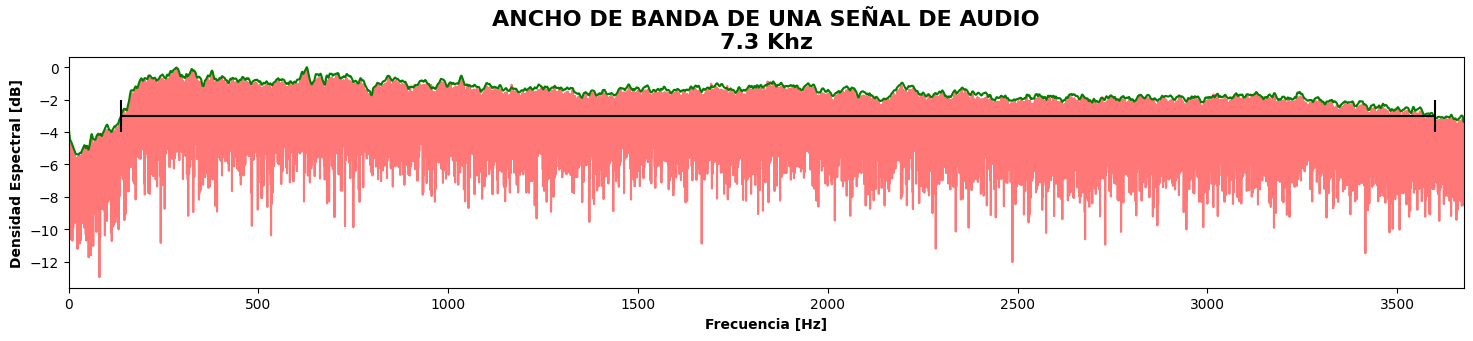

In [9]:
# Características
longitud = 200              # Número de elementos del kernel
mu, sigma = 0, 0.1          # Media y desviación estándar

# Transformada de la señal al dominio de la frecuencia
# ---------------------------------------------------------
DEE = np.square(abs(np.real(FFT)))          # Densidad espectral
Potencia = DEE[range(int(num_muestras/2))]  # Eliminando frecuencias espejo (negativas)
P = Potencia/Potencia.max()                 # Normalización - des-normalización 
S = np.log10(P)                             # Escala logarítmica

# Filtro del espectro - detector de envolvente
# ---------------------------------------------------------
kernel1 = (1/longitud) * np.ones(longitud)          # Filtro de media  sum i=1
kernel2 = np.hamming(longitud)                      # Filtro suavizado - ventana hamming
kernel3 = np.array([0.1, 0.2, 0.4, 0.2, 0.1])       # Filtro suavizado - ventana gaussiana
promedio = np.convolve(P, kernel2, mode='same')     # Convolución de dos funciones
M = np.log10(promedio/promedio.max())

# Ancho de banda 
# ---------------------------------------------------------
centro = int(len(M)/2)
superior = M[range(centro, len(M))]
inferior = M[range(centro)]
tiempo_corte_min = np.where(np.flip(inferior)<-3)[0][0]
tiempo_corte_max = np.where(superior<-3)[0][0]
f_min = f[centro-tiempo_corte_min]
f_max = f[centro+tiempo_corte_max]
WB = f_max-f_min

# Salida estándar
# ---------------------------------------------------------
lines = 38
print(" " + lines*"-")
print(f" Frecuencia corte min:      {f_min:11,.0f} Hz")
print(f" Frecuencia corte max:      {f_max:11,.0f} Hz")
print(f" Ancho de Banda:            {WB/1000:11,.2f} KHz")
print(" " + lines*"-")

# Gráfica
# ---------------------------------------------------------
plt.figure(figsize=(18, 3))
plt.plot(f, S, color='#F77')
plt.plot(f, M, 'g')
plt.hlines(-3, f_min, f_max, 'black')
plt.vlines(f_min, -4, -2, 'black')
plt.vlines(f_max, -4, -2, 'black')

# plt.plot(
#     bins,
#     1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
#     linewidth=2, color='r')

# Garrapatas
plt.xlim(f.min(), f.max())

# Textos en la gráfica
plt.title(
    "Ancho de banda de una señal de Audio\n".upper() +
    f"{frecuencia_de_muestreo/1_000:.1f} Khz", fontsize=16, fontweight="bold")
plt.ylabel("Densidad Espectral [dB]", fontweight="bold")
plt.xlabel("Frecuencia [Hz]", fontweight="bold")

plt.show()

---
## Mas Recursos
- [Radio AM](https://es.wikipedia.org/wiki/Radio_AM) (Wikipedia)
- [Detector de envolvente](https://es.wikipedia.org/wiki/Detector_de_envolvente) (Wikipedia)
- [Detector de envolvente](https://oshwlab.com/giancarlobenavides/am_rx) (Esquemático)
- [AM Transmitter Specifications](https://broadcaststoreeurope.com/upload_dir/shop/Nautel-J1000-specs.pdf) (PDF)
